# 표본과 정보 

In [1]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 그림 그리기를 위한 코드와 한글 실행
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (8,8)   # 그림 크기 조정

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## 빅데이터 시대의 정보 

IT의 발달과 빅데이터의 등장으로 우리는 과거보다 데이터에 더 쉽게 접근할 수 있으며 더 많은 데이터를 얻어서 분석할 수 있게 되었다. 예를 들면 우리나라에 위치한 기상 관측소뿐만 아니라 전 세계에 퍼져 있는 관측소들에서 얻어진 [기상 관측자료](https://data.kma.go.kr/cmmn/main.do)는 아주 쉽게 얻을 수 있다. 과거에는 특별한 자격을 가진 사람들이 자료의 일부분만 이용할 수 있었지만 점점 대중이 사용할 수 있는 데이터의 개방성과 크기가 증가하면서 더 많은 정보를 신속하게 얻을 수 있다.

하지만 아직도 모든 정보를 그렇게 쉽게 얻을 수 있는 것은 아니다. 먼저 자료가 존재해도 개인정보 누출의 위험 때문에 사용에 제약이 있다. 만약 사람들의 의료 기록을 자유롭게 이용할 수 있다면 민감한 개인정보가  노출되는 불행한 일이 벌어질 것이다. 또 사람들이 이용하는 포털이나 통신사의 자료를 제한없이 자유롭게 이용하는 경우도 보안에 큰 문제를 일으킬 수 있다.



## 데이터의 품질

빅데이터가 유용한 형태로 존재하여 쉽게 접근할 수 있는 경우는 증가하고 있지만 매우 흔한 일은 아니다. 
여러분이 간과해서는 안되는 점은 아직도 사람들이 원하는 정확한 정보를 가진 품질이 좋은 자료를 얻기 위해서는 많은 시간과 비용이 든다는 것이다. 

여러분이 원하는 분석에 사용할 수 있는 빅데이터가 있다고 해도 분석을 위한 유용한 자료를 얻기 위해서는 별도의 비용과 노력이 필요한 경우가 많다. 

원하는 정보를 가진 품질이 좋은 자료가 필요한 예들을 들어보자. 이러한 자료를 비용과 노력없이 얻을 수 있을까? 여러분은 아래 예로 든 상황을 상상하면서 어떤 방법으로 어떻게 원하는 자료를 얻을 수 있는지 생각해 보자.

-  선거에 출마한 후보자가 유권자들의 성향을 분석하고 그에 따라서 적절한 선거 전략을 세우기 위해서는 유권자의 생각과 의견을 알고 싶다.

- 정부가 국민의 건강 증진을 위하여 정책을 세우는 경우 국민들의 질병, 건강, 영양 등에 대한 다양한 정보가 필요하다.

- 기업이 판매하고 있는 제품에 대하여 고객의 평가와 의견을 알고 싶다.  

철수가 위에서 예로 든 상황에 필요한 데이터를 얻기 위한 방법으로 다음과 같은 제안을 했다. 여러분은 철수의 생각에 동의하는가?

- 선거구의 가장 번화한 거리에 나가서 지나가는 사람에게 후보자와 정책에 대한 의견을 물어보자. 그냥 물어보면 많은 사람들이 응대를 안할 것이므로 응답한 사람들에게는 선물을 주자.

- 우리나라는 모든 국민이 전국의료보험에 가입되어 있으니 건강보험공단에 있는 전 국민에 대한 의료보험 자료를 이용하자.

- 우리 회사 홈페이지나 SNS에 올려진 고객들의 의견을 찾아서 사용하자. 


## 모집단과 표본 

위에서 제시한 예에서 분석에 필요한 전체자료는 다음과 같다. 우리는 이러한 전체 자료를 **모집단(population)** 이라고 한다. 

- 선거구에 등록된 모든 유권자의 생각과 의견
- 전국민의 질병, 건강, 영양 상태
- 제품을 사용해본 모든 사람들 


데이터과학 분야에서 분석에 사용되는 자료는 많은 경우 전체 자료의 일부분인 표본(sample)자료 이다.

**표본(sample)은 분석의 대상이 되는 전체집단, 즉 모집단(population)의 일부분이다.** 



철수가 제안한 방법으로 얻은 데이터는 모집단의 일부분이므로 표본이다. 표본은 전체자료의 일부분이므로 전체 자료가 지닌 특성과 표본이 가진 특성이 차이가 날 수 있다. 철수가 제안한 방법으로 얻은 표본으로 부터 얻은 정보는 모집단의 실제 특성과 얼마나 차이가 날까? 대부분의 경우 모집단의 특성을 알 수 없으므로 실제로 추출한 표본으로 얻은 정보가 모집단과 얼마나 차이가 나는지는 알 수 없다. 


만약 우리가 표본으로 부터 얻은 정보가 모집단과 얼마나 다른지 전혀 알 수 없다면 표본을 추출하고 조사를 하는 것이 의미가 있는 일일까?

만약 철수가 선거구의 가장 번화한 거리에 나가서 지나가는 사람들 1000명을 면담하고 후보의 지지율이 55% 라는 정보를 얻었다고 하자. 조사한 55%의 지지율이 실제 전체 유권자의 지지율과 얼마나 차이가 나는지 알 수 없다면 이러한 정보 수집은 의미가 있는가? 

가장 번화한 거리를 지나가는 사람들은 매우 다양하기 때문에 전체 유권자를 잘 대표할 수 있고 또한 1000명은 상당한 큰 수이므로 자신의 표본은 쓸만하다고 철수가 주장한다면 여러분은 여기에 동의하는가?  



## 확률표본 

이제 영이가 철수의 방법보다 더 나은 방법이 있다고 주장한다. 영이가 제안한 1000명의 표본을 추출하는 방법은 다음과 같다.

- 지역구의 유권자가 전체 3만명이 있는데 전화국에 유권자들의 전화번호가 수록된 명부가 있다. 이 명부에서 1000명을 **임의로 추출하여** 전화를 걸고 지지 여부와 의견을 물어보자.

임의로 추출되었다(randomly selected)는 의미를 쉽게 표현하면  전화번호가 수록된 명부에서 유권자 1000명을 눈감고 뽑았다는 의미이다. 물론 같은 사람을 두 번 이상 뽑지는 않는다.  

눈감고 뽑았다는 의미는 **모든 유권자가 표본에 포함될 가능성이 같다** 는 것이다. 이렇게 "눈 감고 표본을 추출" 하는 방법을 **단순임의추출(simple random sampling)** 이라고 하며 추출된 표본을 **확률표본(random sample, probability sample)** 이라고 부른다. 

여기서 후보자가 질문을 던진다. 철수가 제안한 방법도 전체 유권자를 어느 정도 적절하게 대표할 수 있는것 같은데 굳이 전화번호 명부에서 1000명을 눈 감고 추출해서 전화를 거는 노력을 할 필요가 있는가? 여러분의 생각은 어떤가? 

철수의 방법으로 얻은 표본을 비확률표본 또는 편의표본((convenience sample)이라고 부른다. 데이터과학에서 다루는 표본은 거의 대부분 확률표본이다. 

- 확률표본: 모집단의 속한 모든 개체가 표본에 속할 가능성이 같은 경우
- 편의표본: 개체가 표본에 포함되는 가능성을 알 수 없는 표본  


## 공공자전거 자료 

이제 확률표본의 성질을 알아보가 위하여 실제 자료를 이용해 보자. 

사용될 자료는 2019년 9월 동안 서울특별시 공공자전거 대여 이력 자료이다. 대여이력 자료를 [자료 사이트](https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do#) 에서 다운로드 받아 데이터프레임 `bike` 로 지정한다.

데이터프레임 `bike` 는 총 407,589 건의 대여 정보가 수록되어 있다. 대여한 자전거 번호, 언제 어디서 대여를 하고 어디에 반납했는지, 사용한 시간과 거리에 모든 정보가 있다. 이제 우리는 2019년 9월 동안 대여된 공공 자전거를 사용할 때 **이용거리** 에 대한 정보에 관심이 있다고 하자. 운행거리에 대한 정보는 자전거를 관리하는데 있어서 매우 유용하게 사용될 것이다. 

일단 **데이터프레임 `bike` 는 모집단이다. 즉,  2019년 9월에 발생한 모든 대여 정보를 수록한 자료이므로 모집단이라고 할 수 있다.** 

이렇게 분석을 위한 필요한 전체 자료를 쉽게 구할 수 있는 사실로서 빅데이터 시대임을 실감하게 된다. 여러분들이 10년 전으로 돌아가서, 자전거 대여소를 일일이 방문하여 손으로 쓰인 운행 기록을 조사한다고 상상해 보자. IT의 발달과 빅데이터의 등장이 우리를 얼마나 편하게 해주는지 실감이 난다. 단, 여러분이 [자료 사이트](https://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do#)에 가서 이용자들의 의견을 보면 정확하고 완전한 데이터를 만드는 것이 얼마나 어려운지 알 수 있다.    


공공자전거 자료에 대한 분석에서는 모집단이 존재하지만 이번 절에서는 모집단의 일부인 표본의 특성을 배우는 것이 목적이므로  데이터프레임 `bike` 를 모집단이라고 가정하고 표본을 추출해 볼 것이다. 

먼저 데이터프레임 `bike`에서  이용거리의 분포의 특성을 살펴보자 

In [4]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

In [5]:
bike.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [6]:
bike.shape

(407589, 11)

이용거리의 분포를 히스토그램과 상자그림으로 그려보자. 오른쪽으로 매우 치우친 분포인것을 알 수 있다. 



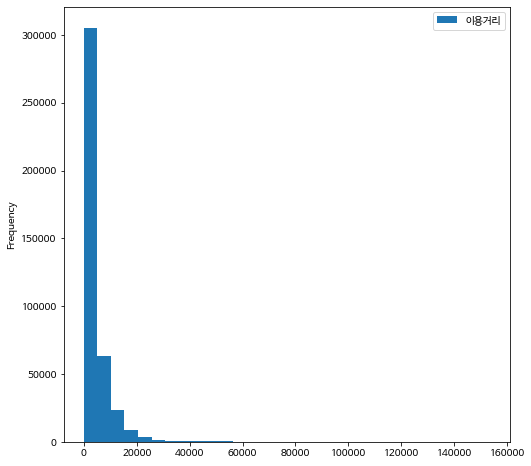

In [7]:
bike.plot.hist(y="이용거리", bins= 30)

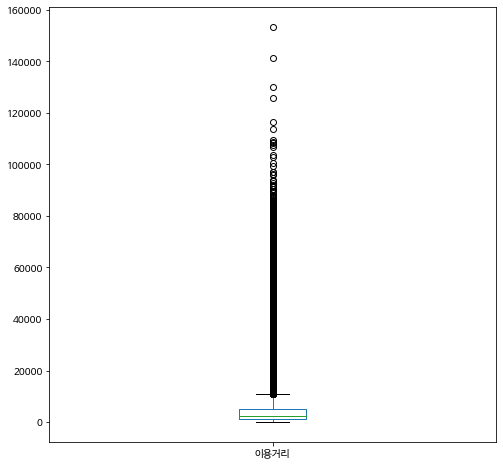

In [8]:
bike.plot.box(y="이용거리")

이제 이용거리에 대한 요약통계량을 구해보자. 아래 요약통계량은 모집단에 대한 정보이다. 

이용거리의 평균은 4253.3 m 이다.

In [9]:
bike[["이용거리"]].describe()

,이용거리
count,407589.000000
mean,4253.336228
std,5782.673901
min,0.000000
25%,1200.000000
50%,2380.000000
75%,5130.000000
max,153490.000000


## 확률표본의 추출

데이터프레임에서 행, 즉 레코드를 단순임의추출 방법으로 추출하는 메소드는 `sample()`이다. 

```
DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
```

- `n`: 표본의 크기
- `frac`: 표본의 비율
- `replace` : 복원추출에 대한 여부 
- `random_state` : 표본추출시 사용되는 난수를 지정. 지정한 난수가 같으면 동일한 표본이 추출된다. 


아래 코드는 `n=100` 개의 표본을 비복원추출(without replacement)로 임의추출하여 데이터프레임 `bike_sample`에 저장한다.

비복원추출(without replacement)은 한 번 추출된 자료를 다시 뽑을 수 없다는 의미이며 반대로 
복원추출(with replacement)은 추출된 자료를 다시 뽑을 수 있다는 의미이다.  상자에 총 407,589 개의 공이 들어 있고 100개를 눈감고 뽑는 경우에 뽑힌 공을 다시 상자에 넣고 추출하는 방법(복원추출)과 뽑힌 공은 다시 상자에 넣지 않는 방법(비복원추출)을 생각하면 된다.  


In [10]:
bike_sample_100 = bike.sample(n=100, replace=False, random_state=1)

In [11]:
bike_sample_100.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
375631,SPB-11285,2019-09-21 10:06:07,1452,겸재교 진입부,9,2019-09-21 10:38:10,3520,광진경찰서,4,30,5920.0
219156,SPB-10989,2019-09-24 22:36:38,2321,학여울역 사거리,9,2019-09-24 22:41:46,2320,도곡역 대치지구대 방향,1,4,0.0
2646,SPB-20213,2019-09-11 15:51:03,1986,태평양물산빌딩,8,2019-09-11 16:28:15,2007,유한양행앞,6,37,5450.0
329716,SPB-05859,2019-09-11 09:09:47,1912,한신휴아파트 앞,9,2019-09-11 09:15:23,2801,대륭포스트타워1차,14,5,830.0
35470,SPB-03699,2019-09-01 14:19:17,2265,이수고가차도 남단,2,2019-09-01 14:34:28,2060,남성역3번출구 뒤,6,14,2160.0
132032,SPB-03922,2019-09-20 22:09:34,274,영등포역지하쇼핑센타 5번출구,1,2019-09-20 23:14:57,2219,"고속터미널역 8-1번, 8-2번 출구 사이",9,65,11820.0
15067,SPB-17943,2019-09-17 18:24:58,2002,노들역 1번출구,18,2019-09-17 19:57:08,2025,흑석역 1번출구,3,91,8560.0
226253,SPB-07462,2019-09-03 18:27:38,2358,구룡초사거리 (현대아파트10동 앞 ),4,2019-09-03 18:41:48,2329,르네상스호텔사거리 역삼지하보도 2번출구,6,13,2520.0
318420,SPB-13058,2019-09-10 15:52:12,2620,송파나루역 4번 출구옆,7,2019-09-10 16:05:27,2622,올림픽공원역 3번출구,8,13,2220.0
405911,SPB-18550,2019-09-09 19:10:55,549,아차산역 3번출구,5,2019-09-09 19:19:11,3542,래미안 구의파크 스위트,17,7,1090.0


In [12]:
bike_sample_100.shape

(100, 11)

이제 추출한 100개의 표본의 분포를 히스토그램과 상자그림으로 그려보고 표본으로 부터 계산한 이용거리의 요약통게량도 구해보자.

표본으로 계산한 이용거리의 평균은 3824.1  m 로서 모집단의 평균 4253.3 m 보다 약 430 m 적게 나타난다.

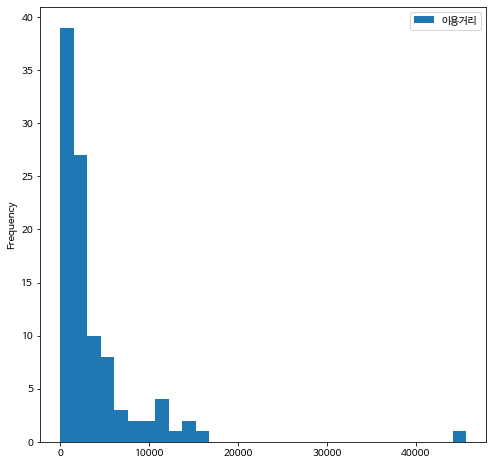

In [13]:
bike_sample_100.plot.hist(y="이용거리", bins= 30)

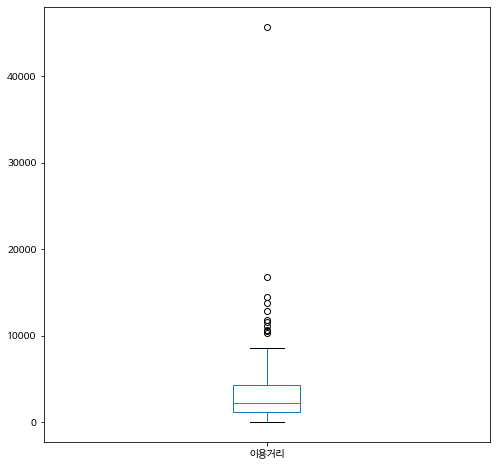

In [14]:
bike_sample_100.plot.box(y="이용거리")

In [15]:
bike_sample_100[["이용거리"]].describe()

,이용거리
count,100.000000
mean,3824.100000
std,5524.629901
min,0.000000
25%,1157.500000
50%,2170.000000
75%,4285.000000
max,45700.000000


## 확률표본의 분포

앞 절에서 배운 분포(distribution)의 정의와 그 특성을 파악하는 방법들을 다시 생각해보자. 분포는 자료가 어떻게 집중되어있고 퍼져있는지 나타내는 것이다. 우리는 자료의 분포를 바차트, 히스토그램, 상자그림으로 표현할 수 있다는 것을 배웠고 또한 평균, 중앙값, 표준편차 등 다양한 통계량을 이용하여 분포의 특성, 즉 분포에 대한 정보를 얻는 방법을 배웠다. 

여러분이 조심해야할 점은 우리가 통상적으로 말하는 "분포"는 주어진 자료가 어떻게 집중되고 퍼져있는지를 나타내는것이고 "확률분포"는 임의로 추출하는 경우 어떤 값이 나타날 수 있는 가능성, 즉 확률을 나타내는 것이다.

**추출된 표본에 속한 데이터의 분포는 경험적 분포(empirical distribution)라고 부른다.** 경험적이라는 의미는  추출된 **관측값들의 분포** 라는 것이다. 대부분 경우 모집단 전체를 관측할 수 없기 때문에 모집단에 대해서는 경험적 분포라고 부르지 않고 모집단 분포(population distribution)라고 따로 부른다.    

확률표본의 경험적 분포는 표본의 수가 증가하면 모집단의 분포와 점점 유사하게 나타날 것이라고 예상할 수 있다. 즉, **표본의 개수(sample size)가 증가하면 확률표본에서 얻은 정보는 모집단에 대한 정보와 점점 가까워 진다.**

위에서 영이의 표본은 확률표본이므로 추출된 유권자의 수가 증가하면 표본으로 부터 얻은 지지율이 모집단의 지지율에 가까워진다. 표본의 크기가 커지면 확률표본의 경험적 분포가 모집단의 분포에 점점 가까워 지는 법칙을 **대수의 법칙** (law of large number)라고 한다.

반면 철수의 방법으로 추출된 표본은 확률표본이 아니기 때문에 유권자의 수가 증가해도 실제 지지율에 가까워지는 것을 보장할 수 없다. 

이제 자전거 전체 모집단에서 10,000 개의 확률표본을 추출해 보고 이를 모집단의 분포와 비교해 보자. 10,000 개의 표본에서 얻은 정보, 즉 상자그림과 요약통계량은 모집단과 매우 유사하다. 표본의 수가 100개인 경우 보다 훨씬 더 모집단의 분포와 가까운 것을 알 수 있다.

10,000 개의 표본으로 부터 얻은 이용거리의 평균은 4263.4 m 로서 모집단의 평균 4253.3 m 와는 단 10 m 차이이다.

아래 코드에서 선택문 ` random_state=` 의 숫자를 바꾸면 다른 10,000 개의 표본이 추출된다. 여러분이 선택문 ` random_state=` 의 숫자를  다른 숫자로 바꾸면서 표본에서 얻어진 이용거리의 평균이 어떻게 변하는지 알아 보자.


In [16]:
bike_sample_10000 = bike.sample(n=10000, replace=False, random_state=2)

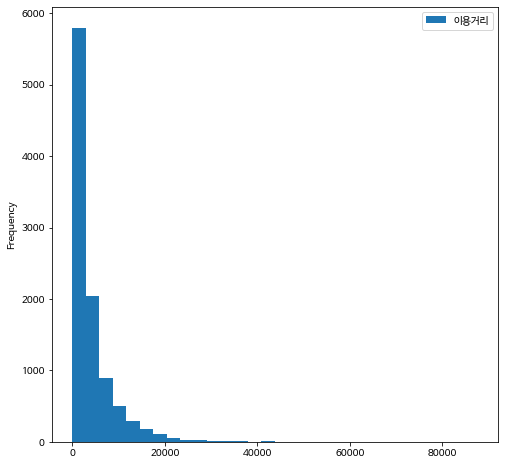

In [17]:
bike_sample_10000.plot.hist(y="이용거리", bins= 30)

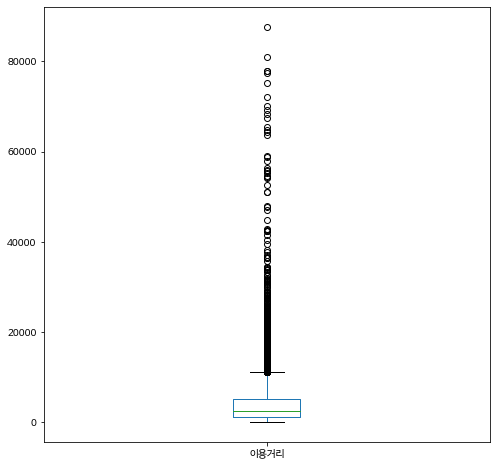

In [18]:
bike_sample_10000.plot.box(y="이용거리")

In [19]:
bike_sample_10000[["이용거리"]].describe()

,이용거리
count,10000.000000
mean,4263.389000
std,5808.952384
min,0.000000
25%,1200.000000
50%,2350.000000
75%,5142.500000
max,87720.000000


In [20]:
bike_sample_10000.이용거리.mean()

4263.389

이제 100개 표본의 분포, 10000개 표본의 분포, 모집단의 분포를 상자그림으로 그려서 비교해 보자. 


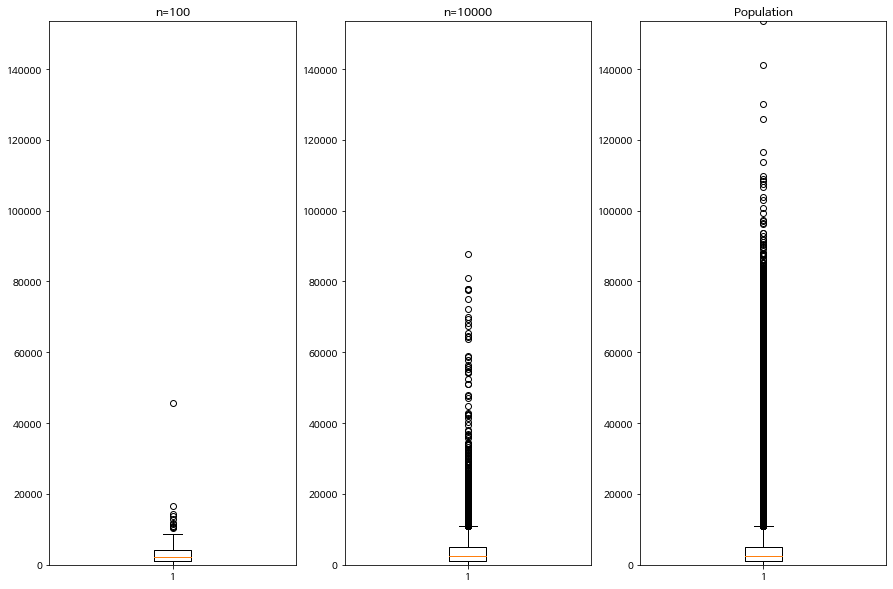

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,10))

axes[0].boxplot(bike_sample_100.이용거리)
axes[0].set_ylim(0,153500)
axes[0].set_title('n=100')

axes[1].boxplot(bike_sample_10000.이용거리)
axes[1].set_ylim(0,153500)
axes[1].set_title('n=10000')

axes[2].boxplot(bike.이용거리)
axes[2].set_ylim(0,153500)
axes[2].set_title('Population')

plt.show()


이제 우리는 표본의 수를 크게 하면서 이용거리의 표본 평균이 모집단의 평균에 가까워지는 현상을 그림으로 나타내보자. 

앞에서 배운 반복문을 사용하여 표본의 수 `n` 를 10 개부터 2,000개 까지 20 개씩 증가시키면서 표본을 추출하고 이용거리에 대한 표본 평균(sample mean)이 어떻게 변하는지 알아 보자.

$$ \bar x_n = \frac{\sum_{i=1}^n x_i}{n}$$

$$ \bar x_{10}, \bar x_{30}, \bar x_{60}, \dots, \bar x_{2000} $$

표본의 크기가 작을 때는 표본 평균이 모집단의 평균에서 멀어진 경우가 많이 나타나지만 표본의 크기가 증가하면서 모집단의 평균에 점점 가까워지는 경향을 보인다. 


In [22]:
n = np.arange(10,2021,20)
n

array([  10,   30,   50,   70,   90,  110,  130,  150,  170,  190,  210,
        230,  250,  270,  290,  310,  330,  350,  370,  390,  410,  430,
        450,  470,  490,  510,  530,  550,  570,  590,  610,  630,  650,
        670,  690,  710,  730,  750,  770,  790,  810,  830,  850,  870,
        890,  910,  930,  950,  970,  990, 1010, 1030, 1050, 1070, 1090,
       1110, 1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310,
       1330, 1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530,
       1550, 1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750,
       1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970,
       1990, 2010])

In [23]:
len(n)

101

In [24]:
sample_mean = np.zeros(len(n))

for i, samplesize in enumerate(n):
  sample_mean[i] = bike.sample(n=samplesize, replace=False).이용거리.mean()

In [25]:
df_sample = pd.DataFrame({'n':n, 'sample_mean':sample_mean })

In [26]:
df_sample.head(10)

,n,sample_mean
0,10,3182.000000
1,30,3319.333333
2,50,6101.200000
3,70,2975.857143
4,90,3352.000000
5,110,3695.272727
6,130,4614.076923
7,150,4292.200000
8,170,5050.411765
9,190,4563.368421


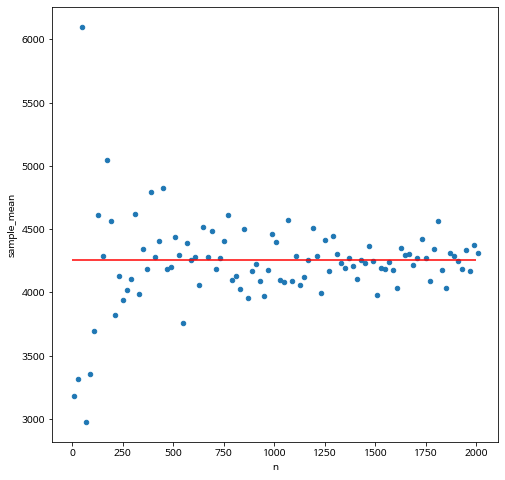

In [27]:
ax = df_sample.plot.scatter(x='n', y='sample_mean')
_ = ax.hlines(y=4253.336228, xmin=0, xmax=2000, colors='r')
plt.show()

## 편의표본


이제 공공자전거 자료에서 편의표본을 추출하는 경우를 생각해 보자. 주어진 상황에 따라서 편의표본을 추출하는 방법은 다양할 것이다. 

철수가 제안한 가장 번화한 거리에 나타난 사람들을 인터뷰하는 편리한 방법처럼, 공공자전거 자료에서도 
데이터프레임의 첫 행부터 순서대로 주어진 개수만큼 표본을 추출하는 방법을 적용해 보자. 공공자전거의 대여정보가 종이로 된 서류화일로에 작성되어 있다면 앞부분만 표본으로 사용하는 방식이라고 생각하자. 만약 100개의 표본이 필요한 경우 엄청난 길이를 가진 서류철에서 처음 100장만 선택하면 정말 편할 것이다.  

앞에서 수행한 실험과 유사하게 표본의 수를 늘려가면서 표본 평균이 어떻게 변하는지 살펴보자.

아래 그림에서 보듯이 편의표본으로 얻은 이용거리의 평균은 표본의 수가 증가해도 실제 모집단의 평균에 전혀 가까이 접근하지 않는다.

왜 우리가 확률표본을 사용해야 하는지 확실하게 알 수 있다. 편의표본을 사용하는 경우는 대수의 법칙이 유효하다는 보장을 할 수 없다. 

In [28]:
sample_mean_conv = np.zeros(len(n))

for i, samplesize in enumerate(n):
  sample_mean_conv[i] = bike.iloc[0:samplesize].이용거리.mean()

In [29]:
df_sample_conv = pd.DataFrame({'n':n, 'sample_mean_conv':sample_mean_conv })

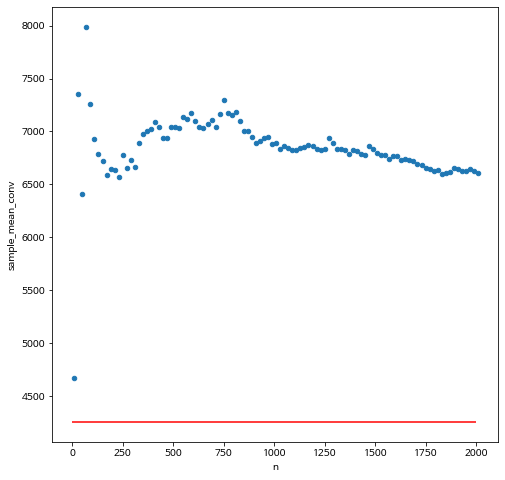

In [30]:
ax = df_sample_conv.plot.scatter(x='n', y='sample_mean_conv')
_ = ax.hlines(y=4253.336228, xmin=0, xmax=2000, colors='r')
plt.show()

## 참고


참고로 이 과목에서는 확률표본을 정의할 때, 모집단의 속한 모든 개체가 표본에 속할 가능성이 같은 경우라고 정의하였다. 하지만 실제로 확률표본을 추출하는 경우 개체마다 표본에 포함될 수 있는 가능성이 다른 경우도 있다.  

우리나라 모든 기업들의 전체 수출액을 얼마인지 추정해야 하는 경우를 생각해 보자. 만약 삼성전자나 
현대 자동차가 표본에 포함되지 않았다면 어떤 일이 벌어질까? 

확률표본의 정확한 정의는 모집단에 속한 개체들이 표본에 포함되는 확률이 미리 정해져 있으며 이러한 확률분포로부터 임의로 추출된 표본을 의미한다. 모집단의 모든 개체가 표본에 속할 가능성이 같은 경우도 표본에 포함될 가능성을 미리 아는 경우에 속한다.  

실제로 우리나라 기업들의 전체 수출액을 얼마인지 추정해야 하는 경우, 모든 대기업들은 반드시 표본에 포함시킨다. 즉 대기업들은 표본에 포함될 확률이 1인 것이다. 또한 기업의 크기, 예를 들어 고용 인원의 수에 따라서 표본에 속할 확률이 달라진다.  
